## 1. Settting Up

Our aim with this document is extracting the 20 intial reviews of each company (49) of the webpage https://www.indeed.com/companies/search?q=nurse&l=New+York%2C+NY

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [2]:
driver = webdriver.Chrome(service = Service("chromedriver.exe"))

In [3]:
url = "https://www.indeed.com/companies/search?q=nurse&l=New+York%2C+NY"
driver.get(url)

In [4]:
from selenium.webdriver.common.by import By

In [5]:
from selenium.webdriver.common.keys import Keys

## 2. Getting to the Review page

In [6]:
links=driver.find_elements(By.CSS_SELECTOR, "a.css-1s5eo7v.eu4oa1w0")

In [7]:
len(links)

50

In [8]:
links[1].send_keys(Keys.CONTROL + Keys.ENTER)

In [9]:
main_window=driver.current_window_handle

In [10]:
driver.switch_to.window(driver.window_handles[1])

In [11]:
l_review = driver.find_elements(By.CSS_SELECTOR, "a.css-iigu5k.emf9s7v0")

In [12]:
l_review[1].click()

In [13]:
l_review_rating=driver.find_elements(By.CSS_SELECTOR, "a.css-1cnefl7.e8ju0x51")

In [14]:
driver.find_element(By.TAG_NAME, "body").send_keys(Keys.PAGE_DOWN)

In [15]:
l_review_rating[0].click()

In [19]:
for n in range(0,6):
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.ARROW_DOWN)

In [20]:
l_review_rating_ascend=driver.find_elements(By.CSS_SELECTOR, "a.css-pya7uq.e8ju0x51")
l_review_rating_ascend[0].click()

In [21]:
for n in range(0,6):
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.ARROW_DOWN)

In [22]:
l_review_location=driver.find_elements(By.CSS_SELECTOR, "button.css-58dwsx.e37uo190")

In [23]:
l_review_location2=driver.find_elements(By.CSS_SELECTOR, "div.cmp-Select__control.css-1faf0s3-control")

In [24]:
len(l_review_location2)

2

In [25]:
l_review_location2[1].click()

In [26]:
lrl2 = driver.find_element(By.ID, "react-select-cmp-Select-Location-input")

In [27]:
lrl2.send_keys("New York, NY" + Keys.ARROW_DOWN + Keys.ENTER)

## 3. Crawling the Review Body Data

In [28]:
doc=BeautifulSoup(driver.page_source, "html.parser")

In [29]:
end=len(doc.find_all(attrs={"itemprop": "reviewBody"}))

In [30]:
rb = [doc.find_all(attrs={"itemprop": "reviewBody"})[n].span.text.strip() for n in range(0,end)]

In [31]:
rb[0]

"If you enjoy a misogynistic, hostile work environment then go for it. This is a horrible place to work. I don't know anyone not looking for another job."

In [32]:
rn = [n.text for n in doc.find(attrs={"itemprop": "name"})]

In [33]:
rn

['NYC Health + Hospitals']

## 4. Looping through all the Companies

In [34]:
from time import sleep

In [35]:
len(links)

50

In [36]:
driver.close()

In [37]:
driver.switch_to.window(main_window)

In [38]:
c_name = []
c_review = []

for l in links[1:50]:
    
    l.send_keys(Keys.CONTROL + Keys.ENTER)
    
    main_window=driver.current_window_handle
    driver.switch_to.window(driver.window_handles[1])

    l_r = driver.find_elements(By.CSS_SELECTOR, "a.css-iigu5k.emf9s7v0")
    l_r[1].click()
    
    sleep(2)
    
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.PAGE_DOWN)
    
    sleep(2)
    
    l_review_rating=driver.find_elements(By.CSS_SELECTOR, "a.css-1cnefl7.e8ju0x51")
    l_review_rating[0].click()
        
    sleep(2)
    
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.PAGE_DOWN)
    
    sleep(2)

    l_review_rating_ascend=driver.find_elements(By.CSS_SELECTOR, "a.css-pya7uq.e8ju0x51")
    l_review_rating_ascend[0].click()
        
    for n in range(0,6):
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.ARROW_DOWN)
        
    sleep(2)
        
    l_review_location=driver.find_elements(By.CSS_SELECTOR, "button.css-58dwsx.e37uo190")

    l_review_location2=driver.find_elements(By.CSS_SELECTOR, "div.cmp-Select__control.css-1faf0s3-control")
    l_review_location2[1].click()
        
    sleep(2)
        
    lrl2 = driver.find_element(By.ID, "react-select-cmp-Select-Location-input")
    lrl2.send_keys("New York, NY" + Keys.ARROW_DOWN + Keys.ENTER)
        
    sleep(2)
        
    doc=BeautifulSoup(driver.page_source, "html.parser")
    
    end=len(doc.find_all(attrs={"itemprop": "reviewBody"}))
    rb = [doc.find_all(attrs={"itemprop": "reviewBody"})[n].span.text.strip() for n in range(0,end)]
    c_review.extend(rb)
    
    rn = [n.text for n in doc.find(attrs={"itemprop": "name"})]
    for n in range(1,end):
        c_name.extend(rn)
    
    driver.close()
    driver.switch_to.window(main_window)

In [39]:
len(c_review)

655

In [40]:
import pandas as pd 

In [41]:
table1 = pd.DataFrame({"Review":c_review})

In [42]:
table1

,Review
0,"If you enjoy a misogynistic, hostile work envi..."
1,Over worked the place is Staffed with lazy pca...
2,This place is horrible! I would never recommen...
3,A joke still a joke \rStep up the level of int...
4,Do not take any job at health & hospital corp....
...,...
650,Small door gives you the opportunity of learni...
651,Upper management really wants to see everyone ...
652,Small Door is an amazing place to work. So man...
653,I can sincerely say that it has been the most ...


## 5. Sentiment Analysis

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [44]:
sentiments=[vader.polarity_scores(r)["neg"] for r in c_review]

In [45]:
neg_scores=pd.DataFrame(sentiments)

In [46]:
table2 = pd.DataFrame({"Review":c_review, "Neg Score":sentiments})

In [47]:
table2

,Review,Neg Score
0,"If you enjoy a misogynistic, hostile work envi...",0.195
1,Over worked the place is Staffed with lazy pca...,0.238
2,This place is horrible! I would never recommen...,0.154
3,A joke still a joke \rStep up the level of int...,0.075
4,Do not take any job at health & hospital corp....,0.175
...,...,...
650,Small door gives you the opportunity of learni...,0.000
651,Upper management really wants to see everyone ...,0.000
652,Small Door is an amazing place to work. So man...,0.019
653,I can sincerely say that it has been the most ...,0.000


In [48]:
table3 = table2[table2["Neg Score"] > 0.1]

In [49]:
table3

,Review,Neg Score
0,"If you enjoy a misogynistic, hostile work envi...",0.195
1,Over worked the place is Staffed with lazy pca...,0.238
2,This place is horrible! I would never recommen...,0.154
4,Do not take any job at health & hospital corp....,0.175
5,The absolute worst job I’ve ever had. Poor man...,0.473
...,...,...
631,Senior management lacks organizational skills....,0.162
635,Great people but management does not appreciat...,0.265
637,I have worked in the medical field for over te...,0.160
638,Besides getting paid well for your work it is ...,0.155


In [50]:
table3.to_excel("Negative Reviews.xlsx")

In [51]:
neg_reviews = list(table3["Review"])

In [52]:
len(neg_reviews)

330

## 6. Text Preprocessing

In [53]:
from nltk.tokenize import word_tokenize

In [54]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words("english"))
my_stopwords = ["work", "company", "enjoy", "job", "position", "good", "thus", "day", "doesnt", "go", "going", "get", "ok", "take", "even", "know", "make", "would"]
new_stopwords = nltk_stopwords.union(my_stopwords)

In [55]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [56]:
from nltk import pos_tag
from nltk.corpus import wordnet

In [57]:
def get_pos(w):
    tag = pos_tag([w])[0][1][0].upper()
    if tag == "V":
        return wordnet.VERB
    elif tag == "N":
        return wordnet.NOUN
    elif tag == "J":
        return wordnet.ADJ
    elif tag == "R":
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [58]:
def my_tokenizer(r):
    r1 = word_tokenize(r)
    r2 = [w.lower() for w in r1 if w.isalpha()]
    r3 = [w for w in r2 if not w in new_stopwords]
    r4 = [lem.lemmatize(w, get_pos(w)) for w in r3]
    return r4

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf = TfidfVectorizer(tokenizer = my_tokenizer)

In [61]:
tfidf_neg_reviews = tfidf.fit_transform(neg_reviews)

In [62]:
tfidf_nr_terms = tfidf.get_feature_names()

## 7. Clustering (# of clusters and type of Clustering)

In [63]:
from sklearn.cluster import KMeans

In [64]:
distance = []

K = range(1,8)
for k in K:
    km1 = KMeans(n_clusters=k, random_state=0)
    km2 = km1.fit(tfidf_neg_reviews)
    d = [km2.inertia_]
    distance.extend(d)

In [65]:
import matplotlib.pyplot as plt

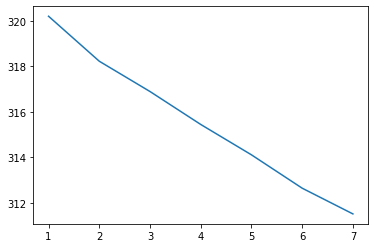

In [66]:
plt.plot(K, distance)
plt.show()

Even though it was difficult, I think the most efficient number of clusters would be 6

### NMF

In [67]:
from sklearn.decomposition import NMF

In [68]:
nmf = NMF(n_components = 6, random_state=0)

In [69]:
nmf.fit(tfidf_neg_reviews)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=6, random_state=0)

In [70]:
nmf_topics = nmf.components_.argsort()[:, ::-1]
top_words_nmf = []

for i in range(0,6):
    top_words_2 = [tfidf_nr_terms[x] for x in nmf_topics[i, :30]]
    top_words_nmf.append(top_words_2)
    print(top_words_2)

['place', 'employee', 'horrible', 'one', 'work', 'like', 'manager', 'anyone', 'everyone', 'team', 'use', 'care', 'run', 'dont', 'hostile', 'hire', 'last', 'hard', 'give', 'career', 'take', 'feel', 'environment', 'great', 'always', 'worker', 'say', 'workplace', 'whole', 'claim']
['pay', 'benefit', 'time', 'day', 'expect', 'week', 'hour', 'offer', 'low', 'vacation', 'sick', 'terrible', 'recommend', 'room', 'call', 'start', 'amount', 'nurse', 'stressful', 'bonus', 'schedule', 'great', 'advancement', 'perk', 'worker', 'high', 'home', 'part', 'slave', 'pto']
['management', 'poor', 'employee', 'balance', 'high', 'lack', 'support', 'environment', 'change', 'turnover', 'life', 'salary', 'overall', 'training', 'leave', 'team', 'make', 'leadership', 'report', 'level', 'look', 'great', 'regard', 'idea', 'much', 'new', 'expectation', 'lot', 'stress', 'skill']
['staff', 'patient', 'care', 'money', 'lot', 'nurse', 'support', 'toxic', 'many', 'hospital', 'problem', 'make', 'feel', 'get', 'payroll', '

## 8. Cosine Similarity using NMF Topic Words

In [71]:
topic_words2 = []

for t in top_words_nmf:
    tt=[" ".join(t)]
    topic_words2.extend(tt)

In [72]:
topic_words2

['place employee horrible one work like manager anyone everyone team use care run dont hostile hire last hard give career take feel environment great always worker say workplace whole claim',
 'pay benefit time day expect week hour offer low vacation sick terrible recommend room call start amount nurse stressful bonus schedule great advancement perk worker high home part slave pto',
 'management poor employee balance high lack support environment change turnover life salary overall training leave team make leadership report level look great regard idea much new expectation lot stress skill',
 'staff patient care money lot nurse support toxic many hospital problem make feel get payroll well unsafe never experience client difficult concerned run shift death enough helpful check especially participant',
 'bad work ever time paid never life project management answer far longer year favoritism let experience less anyone stay new marketing big unprofessional coordinator do communication thin

In [73]:
clusters = []

for n in range (0,6):
    c1 = "Topic_" + str(n)
    clusters.append(c1)

In [74]:
clusters

['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cv = CountVectorizer(tokenizer = my_tokenizer)

In [77]:
cv_reviews = cv.fit_transform(topic_words2)

In [78]:
cv_terms = cv.get_feature_names()

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
cos_sim = cosine_similarity(cv_reviews)

In [81]:
cos_sim = cosine_similarity(cv_reviews)

In [86]:
topic_names = ["Poor Management", "Pay Equity", "Work-Life Balance", "Work Environment", "Organizational Behavior", "HR Management"]

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

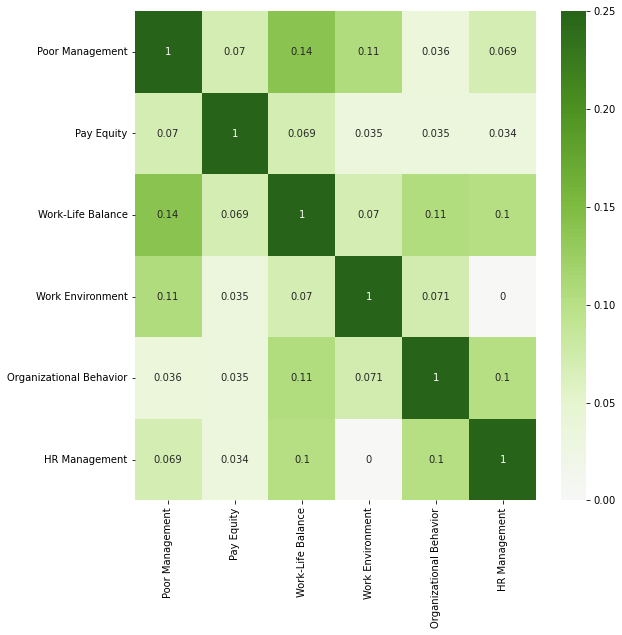

In [101]:
plt.figure(figsize=(9,9))
sns.heatmap(cos_sim, vmin=0, vmax=0.25, center=0, cmap="PiYG", annot=True, xticklabels=topic_names, yticklabels=topic_names)
plt.show()